# Categorical Data Analysis - Chi Squared

[Source](https://ethanweed.github.io/pythonbook/05.01-chisquare.html)

## $\chi^2$ goodness-of-fit test

Suppose I asked people to imagine a shuffled deck of cards, and mentally pick one card from this imaginary deck “at random”. After they’ve chosen one card, I ask them to mentally select a second one. For both choices, what we’re going to look at is the suit (hearts, clubs, spades or diamonds) that people chose. After asking, say, $N=100$ people to do this, I’d like to look at the data and figure out whether or not the cards that people pretended to select were really random. The data are contained in the file called `cards.csv`. Let’s take a look:

In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/cards.csv')
df

,id,choice_1,choice_2
0,subj1,spades,clubs
1,subj2,diamonds,clubs
2,subj3,hearts,clubs
3,subj4,spades,clubs
4,subj5,hearts,spades
...,...,...,...
195,subj196,spades,hearts
196,subj197,hearts,spades
197,subj198,clubs,clubs
198,subj199,spades,hearts


For the moment, let’s just focus on the first choice that people made. We’ll use the `value_counts()` function to count the number of times that we observed people choosing each suit. I’ll save the table to a variable called observed, for reasons that will become clear very soon:

In [3]:
observed = df.choice_1.value_counts()
observed

choice_1
hearts      64
diamonds    51
spades      50
clubs       35
Name: count, dtype: int64

### Null hypothesis and alternative hypothesis

$H_0$: All four suits are chosen with equal probability - $P=(.25,.25,.25,.25)$

$H_1$: At least one suit-choice probability isn't .25 - $P\ne (.25,.25,.25,.25)$

In [4]:
probabilities = pd.Series(
    {
        'hearts': .25,
        'diamonds' : .25,
        'spades' : .25,
        'clubs': .25,
    }
)
probabilities

hearts      0.25
diamonds    0.25
spades      0.25
clubs       0.25
dtype: float64

### Pearson's “goodness of fit” test statistic

As always, if we want to test $H_0$ against $H_1$, we’re going to need a test statistic. The basic trick that a goodness of fit test uses is to construct a test statistic that measures how “close” the data are to the null hypothesis. If the data don’t resemble what you’d “expect” to see if the null hypothesis were true, then it probably isn’t true. Okay, if the null hypothesis were true, what would we expect to see? Or, to use the correct terminology, what are the **expected frequencies**?. There are $N=200$ observations, and (if the null is true) the probability of any one of them choosing a heart is $P_3$, so I guess we’re expecting $200 \times .25 = 50$ hearts, right? Or, more specifically, if we let $E_i$ refer to “the number of category
responses that we’re expecting if the null is true”, then

$$E_i=N \times P_i$$

In [5]:
N = 200
expected = N * probabilities
expected

hearts      50.0
diamonds    50.0
spades      50.0
clubs       50.0
dtype: float64

In [6]:
observed - expected

choice_1
hearts      14.0
diamonds     1.0
spades       0.0
clubs      -15.0
dtype: float64

In [7]:
# squared differences
(observed - expected)**2

choice_1
hearts      196.0
diamonds      1.0
spades        0.0
clubs       225.0
dtype: float64

Divide all these numbers by the expected frequency $E_1$, so we’re actually calculating $\frac{(E_i-O_i)^2}{E_i}$. Since $E_i=50$ for all categories in our example, it’s not a very interesting calculation, but let’s do it anyway

In [8]:
(observed - expected)**2 / expected

choice_1
hearts      3.92
diamonds    0.02
spades      0.00
clubs       4.50
dtype: float64

**Goodness of fit statistic**

In [9]:
sum((observed - expected)**2 / expected)

8.44

### Sampling distribution of GOF statistic

To determine whether or not a particular value of $X_2$ is large enough to justify rejecting the null hypothesis, we’re going to need to figure out what the sampling distribution for $X_2$ would be if the null hypothesis were true. So that’s what I’m going to do in this section. I’ll show you in a fair amount of detail how this sampling distribution is constructed, and then – in the next section – use it to build up a hypothesis test.

In [11]:
import seaborn as sns
import numpy as np
from scipy.stats import chi2

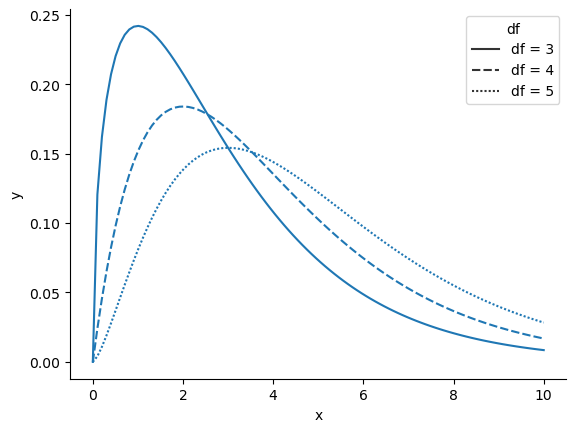

In [15]:
x = np.linspace(0, 10, 100)

y3 = chi2.pdf(x, df=3)
y4 = chi2.pdf(x, df=4)
y5 = chi2.pdf(x, df=5)
labels = ['df = 3']*len(x) + ['df = 4']*len(x) + ['df = 5']*len(x)
y = list(y3)+list(y4)+list(y5)
x = list(x)*3

df = pd.DataFrame(
    {'y': y,
     'x': x,
     'df': labels
    }) 

fig = sns.lineplot(x= "x", y= "y",
             style="df",
             data=df)

sns.despine()

### Testing the null hypothesis

[Text(0.5, 0, 'Value of the GOF Statistic'), Text(0, 0.5, '')]

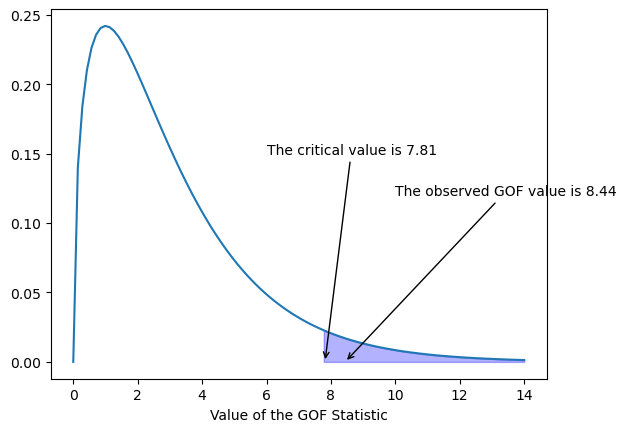

In [16]:

x = np.linspace(0, 14, 100)

y = chi2.pdf(x, df=3)

df = pd.DataFrame(
    {'y': y,
     'x': x
    }) 

fig = sns.lineplot(x= "x", y= "y",
             data=df)
critical_value = chi2.ppf(0.95, 3)
fig.fill_between(x, 0, y, where = x > critical_value-0.1, color = 'blue', alpha = 0.3)

fig.annotate("The observed GOF value is 8.44", xy=(8.44, 0), xytext=(10, 0.12), arrowprops={"arrowstyle":"->", "color":"black"})
fig.annotate("The critical value is 7.81", xy=(critical_value, 0), xytext=(6, 0.15), arrowprops={"arrowstyle":"->", "color":"black"})
fig.set(xlabel = 'Value of the GOF Statistic', ylabel='')

In [17]:
round(chi2.ppf(0.95, 3), 2)

7.81

In [18]:
from scipy.stats import chisquare
chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=8.44, pvalue=0.0377418520240214)

### Complete

In [20]:
import pandas as pd
from scipy.stats import chisquare

df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/cards.csv')

ans = chisquare(f_obs = df['choice_1'].value_counts())

print(f"x2 = {ans[0]}\n p = {round(ans[1],3)}")

x2 = 8.44
 p = 0.038


### Specifying a different null hypothesis

In [21]:
null_probs = pd.Series(
    {
        'hearts': .3,
        'diamonds' : .3,
        'spades' : .2,
        'clubs': .2,
    }
)
null_probs

hearts      0.3
diamonds    0.3
spades      0.2
clubs       0.2
dtype: float64

In [22]:
observed = df.choice_1.value_counts()
expected = null_probs * sum(observed)
ans = chisquare(f_obs=observed, f_exp=expected)
print(f"x2 = {ans[0]}\n p = {round(ans[1],3)}")

x2 = 4.741666666666667
 p = 0.192


### Reporting results

>Of the 200 participants in the experiment, 64 selected hearts for their first choice, 51 selected diamonds, 50 selected spades, and 35 selected clubs. A chi-square goodness of fit test was conducted to test whether the choice probabilities were identical for all four suits. The results were significant ($\chi^2(3)=8.44,p<.05$), suggesting that people did not select suits purely at random.

Note:
- The statistical test is preceded by the descriptive statistics
- The description tells you the null hypothesis
- A stat block is included reporting the relevant statistics

## $\chi^2$ test of independence (association)

Determine whether someone is a human or a robot based on their preference between flowers, puppies or data. Do humans and robots have different preferences?

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/chapek9.csv')
df.head()

,species,choice
0,robot,flower
1,human,data
2,human,data
3,human,data
4,robot,data


In [24]:
df.describe()

,species,choice
count,180,180
unique,2,3
top,human,data
freq,93,109


In [26]:
pd.crosstab(index=df.choice, columns=df.species, margins=True)

species,human,robot,All
choice,,,
data,65,44,109
flower,13,30,43
puppy,15,13,28
All,93,87,180


### Construct hypothesis test

Notation

||Robot|Human|Total|
|---|---|---|---|
|Puppy|$O_{11}$|$O_{12}$|$R_{1}$|
|Flower|$O_{21}$|$O_{22}$|$R_{2}$|
|Data file|$O_{31}$|$O_{32}$|$R_{3}$|
|Total|$C_{1}$|$C_{2}$|$N$|

$O_{ij}$ is the count of the number of respondents of species $j$ who gave the answer $i$.

$H_0$: Robots and humans have the same preference, so
- $P_{11} = P_{12}$
- $P_{21} = P_{22}$
- $P_{31} = P_{32}$

Since the null hypothesis claims the choice is independent of species, the probability for choosing puppy can be $P_1$.

Calculate expected frequencies.

If there are $C_j$ members of a species, the expexted frequency $E$ would be
$$E_{ij}=C_j \times P_i$$
Use row totals to estimate probability.
$$\hat{P}_i=\frac{R_i}{N}$$

$$E_{ij}=\frac{R_i \times C_j}{N}$$

**The $X^2$ statistic**

$$X^2=\sum_{i=1}^r\sum_{j=1}^{c}\frac{(E_{ij}-O{ij})^2}{E_{ij}}$$

**Degrees of Freedom**

$$df = (r-1)(c-1)$$

### Doing the test with scipy.stats

In [27]:
observations = pd.crosstab(index=df.choice, columns=df.species, margins=False)
observations

species,human,robot
choice,,
data,65,44
flower,13,30
puppy,15,13


In [31]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(observations)

print(f'chi2 = \t\t\t{chi2}')
print(f'p = \t\t\t{p}')
print(f'Degrees of freedom = \t{dof}')
print(f'expected = \n{ex}')

chi2 = 			10.721571792595633
p = 			0.004697213134214071
Degrees of freedom = 	2
expected = 
[[56.31666667 52.68333333]
 [22.21666667 20.78333333]
 [14.46666667 13.53333333]]


In [32]:
import pingouin as pg

In [33]:
expected, observed, stats = pg.chi2_independence(df, 
                                                 x='species',
                                                 y='choice')

In [34]:
print(f"scipy's expected frequency \n{ex}")
print(f"pingouin's expected:\n{expected}")

scipy's expected frequency 
[[56.31666667 52.68333333]
 [22.21666667 20.78333333]
 [14.46666667 13.53333333]]
pingouin's expected:
choice        data     flower      puppy
species                                 
human    56.316667  22.216667  14.466667
robot    52.683333  20.783333  13.533333


In [37]:
observed_manual = pd.crosstab(index=df["choice"], columns=df["species"],margins=False)
print(observed_manual)
print(observed.T)

species  human  robot
choice               
data        65     44
flower      13     30
puppy       15     13
species  human  robot
choice               
data        65     44
flower      13     30
puppy       15     13


In [38]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,10.721572,2.0,0.004697,0.244058,0.842961
1,cressie-read,0.666667,10.757745,2.0,0.004613,0.244469,0.844244
2,log-likelihood,0.000000,10.922195,2.0,0.004249,0.246331,0.849966
3,freeman-tukey,-0.500000,11.131562,2.0,0.003827,0.248681,0.856988
4,mod-log-likelihood,-1.000000,11.421716,2.0,0.003310,0.251901,0.866249
5,neyman,-2.000000,12.280435,2.0,0.002154,0.261198,0.890668


### Write up result

>Pearson’s $\chi^2$ revealed a significant association between species and choice ($\chi^2(2) = 10.7, p \lt .01$): robots appeared to be more likely to say that they prefer flowers, but the humans were more likely to say they prefer data.

## Effect Size

Several different measures exist, most common being the $\phi$ statistic or Cram'er's $V$.

$$\phi = \sqrt{\frac{X^2}{N}}$$
$$V = \sqrt{\frac{X^2}{N(k-1)}}

## Test assumptions

- Expected frequencies are sufficiently large
- Data are independent of one another

## Fisher exact test

Used when little data exists

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/salem.csv')
df.head()

,happy,on.fire
0,True,False
1,True,False
2,False,False
3,False,True
4,True,False


In [40]:
pd.crosstab(index=df.happy, columns=[df['on.fire']], margins=False)

on.fire,False,True
happy,,
False,3,3
True,10,0


||Happy|Sad|Total|
|---|---|---|---|
|Set on fire|$O_{11}$|$O_{12}$|$R_{1}$|
|Not set on fire|$O_{21}$|$O_{22}$|$R_{2}$|
|Total|$C_{1}$|$C_{2}$|$N$|

The probability is described by the *hypergeometric distribution*.

$$P(O_{11}, O_{12}, O_{21}, O_{22} \ | \ R_1, R_2, C_1, C_2)$$

In [41]:
from scipy.stats import fisher_exact
freq_table = pd.crosstab(index=df.happy, columns=[df['on.fire']], margins=False)

oddsratio, pvalue = fisher_exact(freq_table)
print(f'{pvalue=}')

pvalue=0.03571428571428571


## The McNemar test

When comparing the same population at two points in time, independence is violated so the Pearson $\chi^2$ test cannot be used. The datat can be recast however, in this form:

||Before: Yes|Before: No|Total|
|---|---|---|---|
|After: Yes|5|5|10|
|After: No|25|65|90|
|Total|30|70|100|

Notice:

||Before: Yes|Before: No|Total|
|---|---|---|---|
|After: Yes|$a$|$b$|$a+b$|
|After: No|$c$|$d$|$c+d$|
|Total|$a+c$|$b+c$|$n$|

In this case, we can test if the row and column totals are the same, ie. $P_a+P_b=P-a+P_c$ and $P_c+P_d=P-b+P_d$, or simply $P_b=P_c$.

$$X^2 = \frac{(|b-c| - 0.5)^2}{b+c}$$

or

$$X^2 = \frac{(|O_{12}-O_{21}| - 0.5)^2}{O_{12} + O_{21}}$$

which as approximately an $\chi^2$ distribution with $df=1$.

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/agpp.csv')
df.head()

,id,response_before,response_after
0,subj.1,no,yes
1,subj.2,yes,no
2,subj.3,yes,no
3,subj.4,yes,no
4,subj.5,no,no


In [43]:
observed, stats = pg.chi2_mcnemar(df, 'response_before', 'response_after')
observed

response_after,0,1
response_before,,
0,65,5
1,25,5


In [44]:
stats

,chi2,dof,p-approx,p-exact
mcnemar,12.033333,1,0.000523,0.000325


Test was significant: $\chi^2(1) = 12.03, p<.001$, suggesting the sets are different and the ads influenced the subjects.